# Содержание
[**Загрузка данных.**](#Загрузка-данных)

[**Предобработка данных.**](#Предобработка-данных)

[**Исследовательский анализ данных.**](#Исследовательский-анализ-данных)

[**Объединение данных.**](#Объединение-данных)

[**Подсчёт выручки.**](#Подсчёт-выручки)

[**Проверка гипотез.**](#Проверка-гипотез)

[**Общий вывод.**](#Общий-вывод)

# Описание проекта

**Сервис аренды самокатов GoFast.**
<br> Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. **Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.**
<br> Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

# Описание данных

1. Пользователи — users_go.csv

* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

2. Поездки — rides_go.csv

* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

3. Подписки — subscriptions_go.csv

* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

# Импортирование библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Загрузка данных

### Откроем файл users_go.csv и изучим его.

In [3]:
data_users = pd.read_csv('/datasets/users_go.csv')

display(data_users.head(10))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**Вывод общей информации о датафрейме.**

In [4]:
print(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


**Признаки:**
* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

**По изученным данным можно заметить, что в датафрейме нет пропусков, все названия столбцов записаны в одном виде, типы данных корректны. Возможно есть дубликаты.**

### Откроем файл rides_go.csv и изучим его.

In [5]:
data_rides = pd.read_csv('/datasets/rides_go.csv')

display(data_rides.tail(10))

,user_id,distance,duration,date
18058,1534,195.447469,6.469074,2021-06-11
18059,1534,3214.021065,18.343604,2021-06-18
18060,1534,3644.708038,20.289416,2021-08-08
18061,1534,3977.744996,26.916544,2021-08-20
18062,1534,4928.173852,22.560373,2021-09-13
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


**Вывод общей информации о датафрейме.**

In [6]:
print(data_rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


**Признаки:**
* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

**По изученным данным можно сделать вывод, что**
1. Пропусков нет.
2. Столбец user_id имеет не уникальные идентификаторы пользователя.
3. Тип данных в столбце date нужно привести к специальному временному типу данных для датафрейма.

### Откроем файл subscriptions_go.csv и изучим его.

In [7]:
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

display(data_subscriptions.head(10))

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод общей информации о датафрейме.**

In [8]:
print(data_subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


**Признаки:**
* subscription_type	- тип подписки
* minute_price	- стоимость одной минуты поездки по данной подписке
* start_ride_price	- стоимость начала поездки
* subscription_fee	- стоимость ежемесячного платежа

**По изученным данным можно сделать вывод, что в датафрейме нет пропусков, типы данных для столбцов корректны.**

### Промежуточный вывод по загрузке данных
<br> Есть столбец в котором нужно исправить тип данных, также возможно присутствуют дубликаты. Во остальном, данные корректны.

## Предобработка данных

### Приведём столбцы к нужным типам данных

In [9]:
# Приведём столбец date в датафрейме с информацией о поездках к типу данных datetime
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')

print(data_rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None


### Добавим столбец с номером месяца

In [10]:
data_rides['month'] = data_rides['date'].dt.month

display(data_rides.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Обработаем дубликаты

**Избавимся от явных дубликатов в датафрейме с информацией о пользователях**

In [11]:
print(data_users.duplicated().sum())

31


In [12]:
data_users.drop_duplicates(inplace = True)

In [13]:
print(data_users.duplicated().sum()) # вывод количества дубликатов после удаления

0


**Избавимся от явных дубликатов в датафрейме с информацией о поездках**

In [14]:
print(data_rides.duplicated().sum())

0


Явные дубликаты в датафрейме с информацией о поездках отсутствуют

### Промежуточный вывод по предобработке данных
<br> На данном этапе были подкорректированы типы данных столбцов, удалены дубликаты. Также был добавлен новый столбец с номером месяца.

## Исследовательский анализ данных

### Оценим частоту встречаемости городов

In [15]:
count_users = data_users['city'].value_counts()

print(count_users)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


Больше всего пользователей из Пятигорска, меньше всего в Москве (вероятнее всего из-за существования большого количества альтернативных сервисов).

***Визуализация информации о частоте встречаемости городов в процентом соотношении***

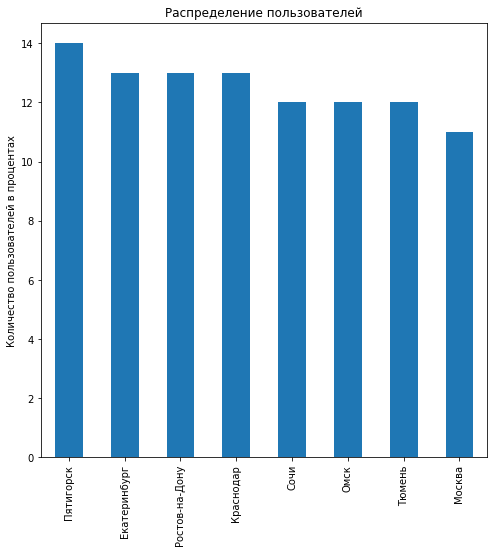

In [16]:
count_users['rate'] = round(data_users['city'].value_counts() / 
                                    count_users.sum(), 2) * 100

count_users['rate'].sort_values(ascending = False).plot(kind = 'bar', 
                         figsize = (8,8),
                         title = 'Распределение пользователей',
                         ylabel = 'Количество пользователей в процентах');

### Оценим соотношение пользователей с подпиской и без подписки

In [17]:
count_subscription = data_users['subscription_type'].value_counts()

print(count_subscription)

free     835
ultra    699
Name: subscription_type, dtype: int64


Количество пользователей без подписки превосходит количество пользователей обладающих ею. 

***Визуализация соотношения пользователей с подпиской и без подписки***

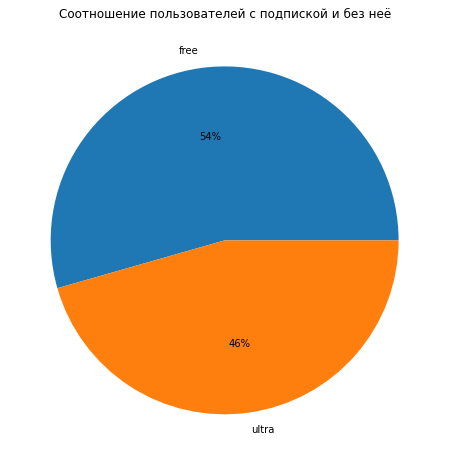

In [18]:
count_subscription.plot(kind = 'pie',
                        autopct = '%1.0f%%',
                        figsize = (8,8),
                        title = 'Соотношение пользователей с подпиской и без неё',
                        ylabel = '');

### Оценим возраст пользователей

In [19]:
display(data_users['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Можем заметить, что основная часть пользователей - люди до 28 лет. 

***Визуализация данных связанных с возрастом пользователей***

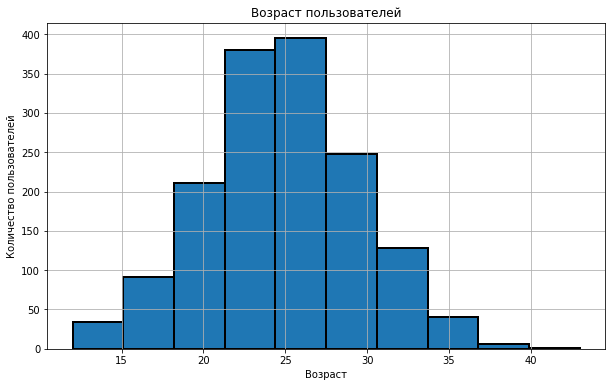

In [20]:
data_users['age'].plot(kind = 'hist', 
                       grid = 'True',
                       figsize = (10, 6),
                       edgecolor="black",
                       linewidth=2,
                       title = 'Возраст пользователей');
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');

### Оценим  расстояние, которое пользователь преодолел за одну поездку

In [39]:
display(data_rides['distance'].describe())

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Можем заметить, что наименьшая пройденная дистанция меньше 1 метра (вероятнее всего пользователь сразу же отменил аренду, либо произошёл технический сбой). Максимальная дистанция равна 7 км. Среднее растояние, которое проходят пользователи за 1 поездку равно 3 км.

***Визуализация данных связанных с расстоянием, которое пользователь преодолел за одну поездку***

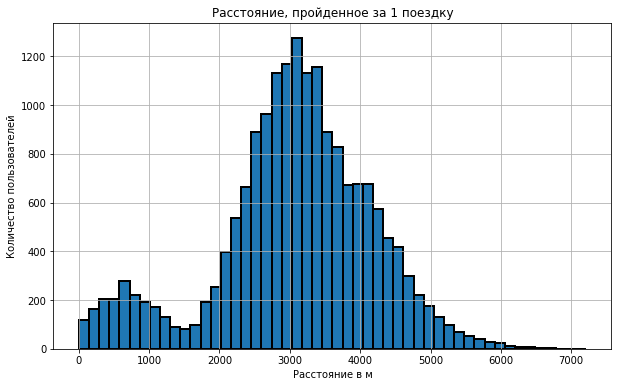

In [22]:
data_rides['distance'].plot(kind = 'hist', 
                       grid = 'True',
                       figsize = (10, 6),
                       edgecolor="black",
                       linewidth=2,
                       title = 'Расстояние, пройденное за 1 поездку',
                       bins = 50);
plt.xlabel('Расстояние в м');
plt.ylabel('Количество пользователей');

### Оценим  продолжительность поездок

In [40]:
display(data_rides['duration'].describe())

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Минимальное время поездки равно 30 секунд (вероятнее всего самокат сняли сразу с аренды по какой-то причине). Максимальное время поездки равно 40 минутам. В основном, поездки длятся 17 минут.

***Визуализация данных связанных с продолжительностью поездок***

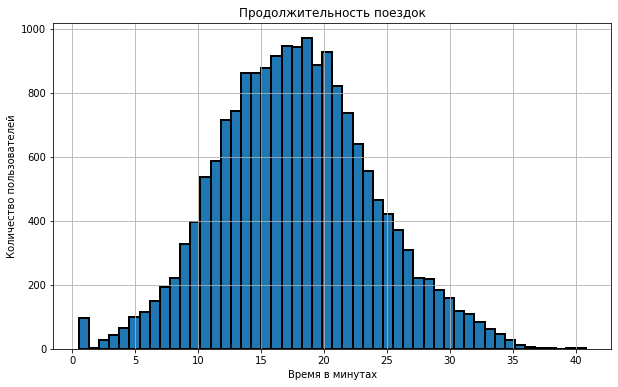

In [24]:
data_rides['duration'].plot(kind = 'hist', 
                       grid = 'True',
                       figsize = (10, 6),
                       edgecolor="black",
                       linewidth=2,
                       title = 'Продолжительность поездок',
                       bins = 50);
plt.xlabel('Время в минутах');
plt.ylabel('Количество пользователей');

### Промежуточный вывод по исследовательскому анализу данных
1. Частота встречаемости городов. 
<br> Примерно одинаковое количество пользователей из разных городов, но разница всё же есть. **Больше всего людей пользуются в г. Пятигорск, меньше всего в г. Москва**. Пятигорск не очень большой город и вероятнее всего здесь передвигаться удобнее на самокате. Что касается Москвы, пользователей наименьшее количество из-за огромной вариации разных сервисов. 
2. Cоотношение пользователей с подпиской и без подписки.
<br> Пользователей без подписки больше, чем пользователей с подпиской, но разница не огромная.
* **Пользователи без подписки (тариф free) - 54 %**
* **Пользователи с подпиской (тариф ultra) - 46 %**
3. Возраст пользователей.
<br> Основная часть пользователей находятся в диапазоне **от 22 до 28 лет.** Наименьший возраст составляет 12 лет, наибольший 43 года.
4. Расстояние, которое пользователь преодолел за одну поездку.
<br> В основном пользователи проезжают **от 2 до 4.5 км.** Наименьшая дистанция равна 0.85 м, наибольшая 7,2 км.
5. Продолжительность поездок.
<br> В основном длительность поездки состовляет **от 10 до 25 минут.** Самая короткая поездка длилась полминуты (возможен технический сбой или клиент сразу сбросил аренду), самая длинная поездка 40 минут.

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [25]:
data_all = data_users.merge(data_rides)

data_all = data_all.merge(data_subscriptions)

display(data_all)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Проверим количество строк полученной таблицы и сравним ее с количеством строк таблиц до объединения, чтобы убедиться что мы ничего не потеряли и не добавили лишнего.**

In [26]:
print('Количество строк таблицы с информацией о поездках =', data_rides.shape[0])
print('Количество строк таблицы с информацией о пользователях =', data_users.shape[0])
print('Количество строк таблицы с информацией о подписках =', data_subscriptions.shape[0])
print('Количество строк полученной таблицы =', data_all.shape[0])

Количество строк таблицы с информацией о поездках = 18068
Количество строк таблицы с информацией о пользователях = 1534
Количество строк таблицы с информацией о подписках = 2
Количество строк полученной таблицы = 18068


**Можем заметить, что количество строк полученной таблицы равно количеству строк таблицы с информацией о поездках. Остальные таблицы имеют меньшее количество строк, следовательно можно сказать, что никаких новых строк добавлено не было и никаких старых строк не было потярено.**

### Создадим датафрейм из датафрейма, созданного на этапе 4.1, c данными о пользователях без подписки.

In [27]:
data_free_sub = data_all.query("`subscription_type` == 'free'")

display(data_free_sub)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


**Визуализируем информацию о расстоянии и времени поездок для пользователей не имеющих подписки**

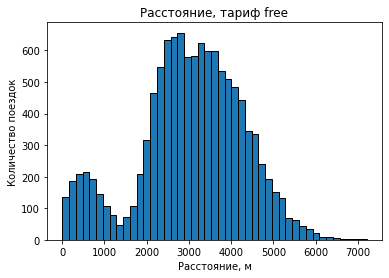

<Figure size 1440x1440 with 0 Axes>

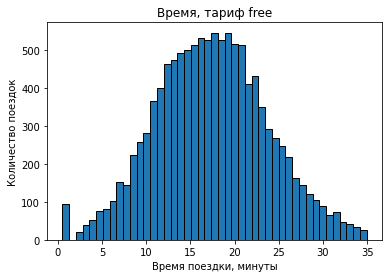

<Figure size 1440x1440 with 0 Axes>

In [28]:
plt.hist(data_free_sub['distance'], bins=45, edgecolor = 'black')
plt.title('Расстояние, тариф free')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

plt.hist(data_free_sub['duration'], bins=45, edgecolor = 'black')
plt.title('Время, тариф free')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

### Создадим датафрейм из датафрейма, созданного на этапе 4.1, c данными о пользователях с подпиской.

In [29]:
data_ultra_sub = data_all.query("`subscription_type` == 'ultra'")

display(data_ultra_sub)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


**Визуализируем информацию о расстоянии и времени поездок для пользователей обладающих подпиской**

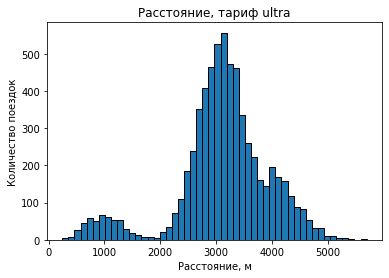

<Figure size 1440x1440 with 0 Axes>

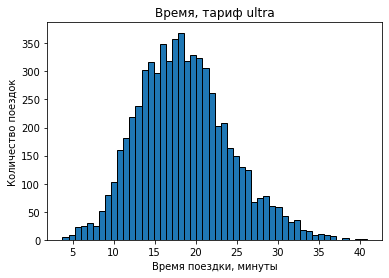

<Figure size 1440x1440 with 0 Axes>

In [30]:
plt.hist(data_ultra_sub['distance'], bins=50, edgecolor = 'black')
plt.title('Расстояние, тариф ultra')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

plt.hist(data_ultra_sub['duration'], bins=50, edgecolor = 'black')
plt.title('Время, тариф ultra')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

### Промежуточный вывод по объединению данных
<br> На этом этапе были созданы два дополнительных датафрейма и визуализированы некоторые данные по ним. 
* Для пользователей без подписки большую часть составляют поездки: **от 10 до 25 минут и от 2 до 4.8 км**
* Для пользователей с подпиской большую часть составляют поездки: **от 12 до 22 минут и от 2,5 до 3.8 км**
<br> Можно сделать вывод, что пользователи без подписки совершают более долгие поездки и на большем расстоянии, чем пользователи обладающих подпиской.

## Подсчёт выручки

### Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [31]:
data_all['duration'] = np.ceil(data_all['duration'])

total_data = pd.pivot_table(data_all,
                            index = ['month', 'user_id'],
                            values = ['distance', 'name', 'duration', 'subscription_type'],
                            aggfunc = {'distance' : sum,
                                       'name' : len,
                                       'duration' : sum,
                                       'subscription_type' : max})

total_data.rename(columns = {'name' : 'count_trips'}, inplace = True)

display(total_data.tail())

distance  duration  count_trips subscription_type
month user_id                                                      
12    1525     4597.854350      34.0            1              free
      1526     3644.121544      23.0            1              free
      1528     3998.569324      11.0            1              free
      1532     6111.889853      42.0            2              free
      1534     2371.711192      16.0            1              free

### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [32]:
def proceeds(row):
    if row['subscription_type'] == 'free':
        return (50 * row['count_trips']) + 8 * row['duration']
    else:
        return 6 * row['duration'] + 199

In [33]:
total_data['proceeds_per_month'] = total_data.apply(proceeds, axis = True)

display(total_data.head())

distance  duration  count_trips subscription_type  \
month user_id                                                         
1     1        7027.511294      42.0            2             ultra   
      3        3061.777147      13.0            1             ultra   
      5        3914.646990      13.0            1             ultra   
      7        6478.080979      28.0            2             ultra   
      12       3577.151148      33.0            1             ultra   

               proceeds_per_month  
month user_id                      
1     1                     451.0  
      3                     277.0  
      5                     277.0  
      7                     367.0  
      12                    397.0

**Посмотрим на значения в добавленном столбце**

In [34]:
print(total_data['proceeds_per_month'].describe())

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: proceeds_per_month, dtype: float64


**В целом, никаких аномальных значений не наблюдается.**

### Промежуточный вывод по подсчёту выручки.
<br> На данном этапе была создана сводная таблица для более удобной работы с такими данными, как суммарное расстояние, количество поездок и суммарное время для каждого пользователя за месяц. 
<br> В эту своднудю таблицу был добавлен новый столбец с подсчётом выручки за месяц по каждому пользователю.

## Проверка гипотез

### Проверим, тратят ли пользователи с подпиской больше времени на поездки или нет.

**Гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.**
<br>H_0: Время потраченное на поездку с подпиской = время потраченное на поездку без подписки
<br>H_1: Время потраченное на поездку с подпиской > время потраченное на поездку без подписки
<br>Уровень значимости = 0.05

In [35]:
free = data_free_sub['duration']
ultra = data_ultra_sub['duration'] 

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative = 'greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод**
<br> Можем утвреждать пользователи с подпиской тратят больше времени на поездки.

### Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим это.

**Гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.**
<br>H_0: Расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130 м.
<br>H_1: Расстояние, которое проезжают пользователи с подпиской за одну поездку > 3130 м.
<br>Уровень значимости = 0.05

In [36]:
distance = data_ultra_sub['distance']

alpha = 0.05

results = st.ttest_1samp(
    distance,
    3130,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод**
<br> Не можем утверждать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

### Проверим, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Гипотеза: помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки.**
<br>H_0: Помесячная выручка от пользователей с подпиской = Помесячная выручка от пользователей без подписки.
<br>H_1: Помесячная выручка от пользователей с подпиской > Помесячная выручка от пользователей без подписки.
<br>Уровень значимости = 0.05

In [37]:
free_per_month = total_data.loc[total_data.subscription_type == 'free', 'proceeds_per_month'] 
ultra_per_month = total_data.loc[total_data.subscription_type == 'ultra', 'proceeds_per_month'] 


results = st.ttest_ind(ultra_per_month, 
                       free_per_month,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут тоже дополнительно можно вывести средние значения выручки для каждой категории пользователей.</div>

**Вывод**
<br>Можем утверждать, что выручка с пользователей имеющих подписку больше, чем выручка с пользователей не имеющих подписки.

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезы понадобилась бы гипотеза о равенстве средних для парных выборок.

**Метод, который нужно будет применить для проверки гипотезы: *ttest_rel()*.**

## Общий вывод
Для выполнения данной работы были использованы 3 датафрейма с информацией о пользователях, их поездках и подписках. 

<br> На этапе **предобработки данных** были:
* изменены типы данных, где это необходимо
* удалены дубликаты 
* добавлен новый столбец с номером месяца

<br> Далее был проведён **исследовательский анализ данных.** 
1. Прежде всего оценили частоту встречаемости городов, в результате чего выяснили, что 
* Количество пользователей распределено примерно одинаково, сильно отклоняющихся значений нет
* Самое большое количество пользователей в Пятигорске и составляет оно 14 % от общего значения.
* Самое маленькое количество пользователей в Москве, 11 % от общего значения.
2. После, оценили соотношение пользователей с подпиской и без подписки. Оказалось, что пользователей без подписки больше, что было и ожидаемо, но существенной разницы нет.
* Пользователи без подписки (тариф free) - 54 %**
* Пользователи с подпиской (тариф ultra) - 46 %**
3. Далее, оценили возраст пользователей. Основная часть пользователей это люди возрастом от 22 до 28 лет.
4. Оценка расстояния, которое пользователь преодолел за одну поездку, показала, что пользователи проезжают от от 2 до 4.5 км
5. Под конец данного этапа, была оценена продолжительность поездок. Большая часть поездок длилась от 10 до 25 минут.

<br> Для того, чтобы можно было удобно посчитать помесячную выручку, которую принёс каждый пользователь, **объединили данные о пользователях, поездках и подписках в один датафрейм**, а также **создали два датафрейма** из только что созданного датафрейма.

<br> Информация о расстоянии и времени поездок для пользователей обеих категорий была визуализирована:
* Для пользователей без подписки большую часть составляют поездки: **от 10 до 25 минут и от 2 до 4.8 км**
* Для пользователей с подпиской большую часть составляют поездки: **от 12 до 22 минут и от 2,5 до 3.8 км**

<br> Далее была подсчитана помесячная выручка, которую принёс каждый пользователь. Для этого была использована формула: **(стоимость старта поездки ×  количество поездок) + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.**

<br> В конце проекта **были проверены гипотезы**.
1. Гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
<br> *Нулевая гипотеза была отвержена*
2. Гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
<br> *Нулевую гипотезу отвергнуть не удалось*
3. Гипотеза: помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки.
<br> *Нулевая гипотеза была отвержена*